# Clustering

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [Malaya/example/clustering](https://github.com/huseinzol05/Malaya/tree/master/example/clustering).
    
</div>

<div class="alert alert-warning">

This module visualized using matplotlib, a static image, and this caused saturated graph. Use returned value to visualize using dynamic library.
    
</div>

In [1]:
%%time
import malaya

CPU times: user 4.83 s, sys: 722 ms, total: 5.55 s
Wall time: 4.92 s


### Cluster same word structure based on POS and Entities

In [2]:
string = 'KUALA LUMPUR: Sempena sambutan Aidilfitri minggu depan, Perdana Menteri Tun Dr Mahathir Mohamad dan Menteri Pengangkutan Anthony Loke Siew Fook menitipkan pesanan khas kepada orang ramai yang mahu pulang ke kampung halaman masing-masing. Dalam video pendek terbitan Jabatan Keselamatan Jalan Raya (JKJR) itu, Dr Mahathir menasihati mereka supaya berhenti berehat dan tidur sebentar  sekiranya mengantuk ketika memandu.'

In [3]:
entity = malaya.entity.transformer(model = 'albert', quantized = True)
pos = malaya.pos.transformer(model = 'albert', quantized = True)

INFO:tensorflow:loading sentence piece model


INFO:tensorflow:loading sentence piece model


INFO:tensorflow:loading sentence piece model


INFO:tensorflow:loading sentence piece model


In [4]:
result_entities = entity.predict(string)
result_pos = pos.predict(string)

In [5]:
generated_grams = malaya.generator.pos_entities_ngram(
    result_pos,
    result_entities,
    ngram = (1, 3),
    accept_pos = ['NOUN', 'PROPN', 'VERB'],
    accept_entities = ['law', 'location', 'organization', 'person', 'time'],
)
generated_grams

['tidur sebentar',
 'Jabatan Keselamatan',
 'menitipkan',
 'pesanan',
 '(JKJR)',
 'Menteri Tun',
 'Jalan Raya',
 'Raya',
 'Mahathir Mohamad Menteri',
 'Mahathir menasihati berhenti',
 'berehat',
 'pesanan orang pulang',
 'kampung halaman',
 'halaman video terbitan',
 'Tun Dr Mahathir',
 'terbitan Jabatan Keselamatan',
 'video terbitan',
 '(JKJR) Dr Mahathir',
 'video',
 'Siew Fook menitipkan',
 'Loke',
 'LUMPUR: sambutan Aidilfitri',
 'Siew Fook',
 'Menteri',
 'berehat tidur sebentar',
 'Raya (JKJR) Dr',
 'sebentar',
 'Tun',
 'Menteri Pengangkutan Anthony',
 'Jabatan',
 'orang pulang kampung',
 'Jabatan Keselamatan Jalan',
 'memandu.',
 'Loke Siew Fook',
 'Mohamad Menteri',
 'Menteri Pengangkutan',
 'terbitan',
 'Keselamatan Jalan Raya',
 'KUALA',
 'Pengangkutan Anthony',
 'minggu Perdana',
 'berhenti berehat tidur',
 'Fook',
 'Tun Dr',
 'Dr Mahathir',
 'halaman',
 'Dr Mahathir menasihati',
 'Aidilfitri minggu',
 'Anthony Loke Siew',
 'LUMPUR:',
 'minggu Perdana Menteri',
 'Dr Mahathir

In [6]:
malaya.cluster.cluster_words(generated_grams)

['berehat tidur sebentar',
 'Raya (JKJR) Dr',
 'menitipkan pesanan orang',
 'Anthony Loke Siew',
 'sambutan Aidilfitri minggu',
 'minggu Perdana Menteri',
 'Dr Mahathir Mohamad',
 'Menteri Pengangkutan Anthony',
 'Pengangkutan Anthony Loke',
 'Mahathir Mohamad Menteri',
 'Jalan Raya (JKJR)',
 'Mahathir menasihati berhenti',
 'pesanan orang pulang',
 'orang pulang kampung',
 'KUALA LUMPUR: sambutan',
 'Jabatan Keselamatan Jalan',
 'video terbitan Jabatan',
 'Loke Siew Fook',
 'halaman video terbitan',
 'Keselamatan Jalan Raya',
 'Perdana Menteri Tun',
 'Mohamad Menteri Pengangkutan',
 'kampung halaman video',
 'berhenti berehat tidur',
 'Fook menitipkan pesanan',
 'Tun Dr Mahathir',
 'Aidilfitri minggu Perdana',
 'terbitan Jabatan Keselamatan',
 'tidur sebentar memandu.',
 'Menteri Tun Dr',
 '(JKJR) Dr Mahathir',
 'menasihati berhenti berehat',
 'Siew Fook menitipkan',
 'pulang kampung halaman',
 'Dr Mahathir menasihati',
 'LUMPUR: sambutan Aidilfitri']

### Cluster Part-Of-Speech

In [7]:
malaya.cluster.cluster_pos(result_pos)

{'ADJ': ['depan,', 'khas', 'ramai', 'pendek', 'mengantuk'],
 'ADP': ['Sempena', 'kepada', 'ke', 'Dalam'],
 'ADV': ['mahu'],
 'ADX': [],
 'CCONJ': ['dan'],
 'DET': ['masing-masing.', 'itu,'],
 'NOUN': ['sambutan Aidilfitri minggu',
  'pesanan',
  'orang',
  'kampung halaman',
  'video',
  'terbitan',
  'sebentar'],
 'NUM': [],
 'PART': [],
 'PRON': ['yang', 'mereka'],
 'PROPN': ['KUALA LUMPUR:',
  'Perdana Menteri Tun Dr Mahathir Mohamad',
  'Menteri Pengangkutan Anthony Loke Siew Fook',
  'Jabatan Keselamatan Jalan Raya',
  'Dr Mahathir'],
 'PUNCT': ['(JKJR)'],
 'SCONJ': ['supaya', 'sekiranya', 'ketika'],
 'SYM': [],
 'VERB': ['menitipkan',
  'pulang',
  'menasihati',
  'berhenti berehat',
  'tidur',
  'memandu.'],
 'X': []}

### Cluster Entities

In [8]:
malaya.cluster.cluster_entities(result_entities)

{'OTHER': ['Sempena sambutan',
  'minggu depan,',
  'dan',
  'menitipkan pesanan khas kepada orang ramai yang mahu pulang ke kampung halaman masing-masing. Dalam video pendek terbitan',
  'itu,',
  'menasihati mereka supaya berhenti berehat dan tidur sebentar sekiranya mengantuk ketika memandu.'],
 'law': [],
 'location': ['KUALA LUMPUR:'],
 'organization': ['Jabatan Keselamatan Jalan Raya (JKJR)'],
 'person': ['Perdana Menteri Tun Dr Mahathir Mohamad',
  'Menteri Pengangkutan Anthony Loke Siew Fook',
  'Dr Mahathir'],
 'quantity': [],
 'time': [],
 'event': ['Aidilfitri'],
 'X': []}

### Load example data

In [4]:
%matplotlib inline

import pandas as pd
df = pd.read_csv('tests/02032018.csv',sep=';')
df = df.iloc[3:,1:]
df.columns = ['text','label']
corpus = df.text.tolist()

You can get this file [Malaya/tests](https://github.com/huseinzol05/Malaya/tree/master/tests). **This csv already stemmed.**

In [5]:
model = malaya.sentiment.transformer(model = 'alxlnet', quantized = True)
similarity_model = malaya.similarity.transformer(model = 'alxlnet', quantized = True)

### Generate scatter plot for unsupervised clustering

```python
def cluster_scatter(
    corpus: List[str],
    vectorizer,
    num_clusters: int = 5,
    titles: List[str] = None,
    colors: List[str] = None,
    stopwords = get_stopwords,
    cleaning = simple_textcleaning,
    clustering = KMeans,
    decomposition = MDS,
    ngram: Tuple[int, int] = (1, 3),
    figsize: Tuple[int, int] = (17, 9),
    batch_size: int = 20,
):
    """
    plot scatter plot on similar text clusters.

    Parameters
    ----------

    corpus: List[str]
    vectorizer: class
        vectorizer class.
    num_clusters: int, (default=5)
        size of unsupervised clusters.
    titles: List[str], (default=None)
        list of titles, length must same with corpus.
    colors: List[str], (default=None)
        list of colors, length must same with num_clusters.
    stopwords: List[str], (default=malaya.texts.function.get_stopwords)
        A callable that returned a List[str], or a List[str], or a Tuple[str]
    ngram: Tuple[int, int], (default=(1,3))
        n-grams size to train a corpus.
    cleaning: function, (default=malaya.texts.function.simple_textcleaning)
        function to clean the corpus.
    batch_size: int, (default=10)
        size of strings for each vectorization and attention. Only useful if use transformer vectorizer.

    Returns
    -------
    dictionary: {'X': X, 'Y': Y, 'labels': clusters, 'vector': transformed_text_clean, 'titles': titles}
    """
```

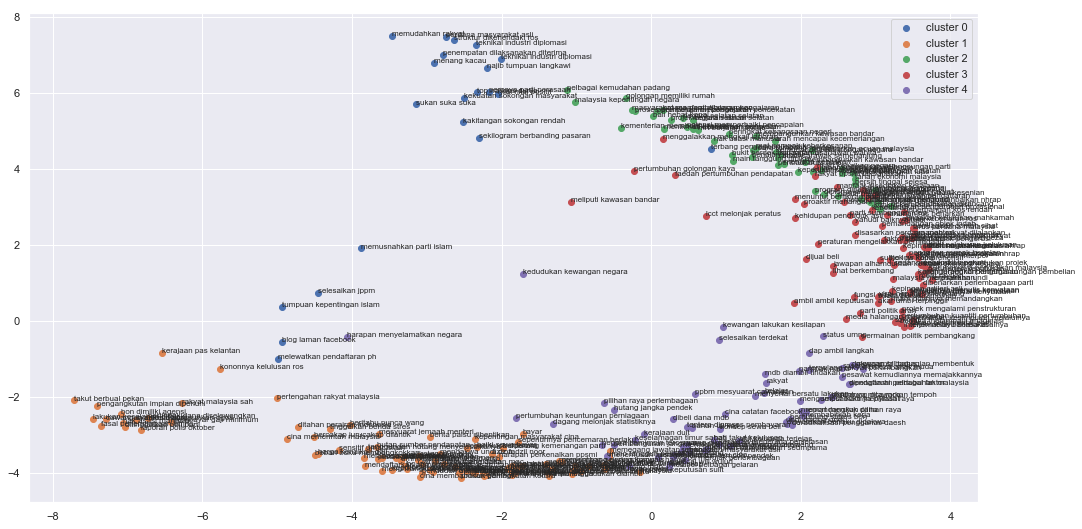

In [11]:
result_scatter = malaya.cluster.cluster_scatter(corpus, vectorizer = model)

### Generate dendogram plot for unsupervised clustering

```python
def cluster_dendogram(
    corpus: List[str],
    vectorizer,
    titles: List[str] = None,
    stopwords = get_stopwords,
    cleaning = simple_textcleaning,
    random_samples: float = 0.3,
    ngram: Tuple[int, int] = (1, 3),
    figsize: Tuple[int, int] = (17, 9),
    batch_size: int = 20,
):
    """
    plot hierarchical dendogram with similar texts.

    Parameters
    ----------

    corpus: List[str]
    vectorizer: class
        vectorizer class.
    num_clusters: int, (default=5)
        size of unsupervised clusters.
    titles: List[str], (default=None)
        list of titles, length must same with corpus.
    stopwords: List[str], (default=malaya.texts.function.get_stopwords)
        A callable that returned a List[str], or a List[str], or a Tuple[str]
    cleaning: function, (default=malaya.text.function.simple_textcleaning)
        function to clean the corpus.
    random_samples: float, (default=0.3)
        random samples from the corpus, 0.3 means 30%.
    ngram: Tuple[int, int], (default=(1,3))
        n-grams size to train a corpus.
    batch_size: int, (default=20)
        size of strings for each vectorization and attention. Only useful if use transformer vectorizer.

    Returns
    -------
    dictionary: {'linkage_matrix': linkage_matrix, 'titles': titles}
    """
``` 

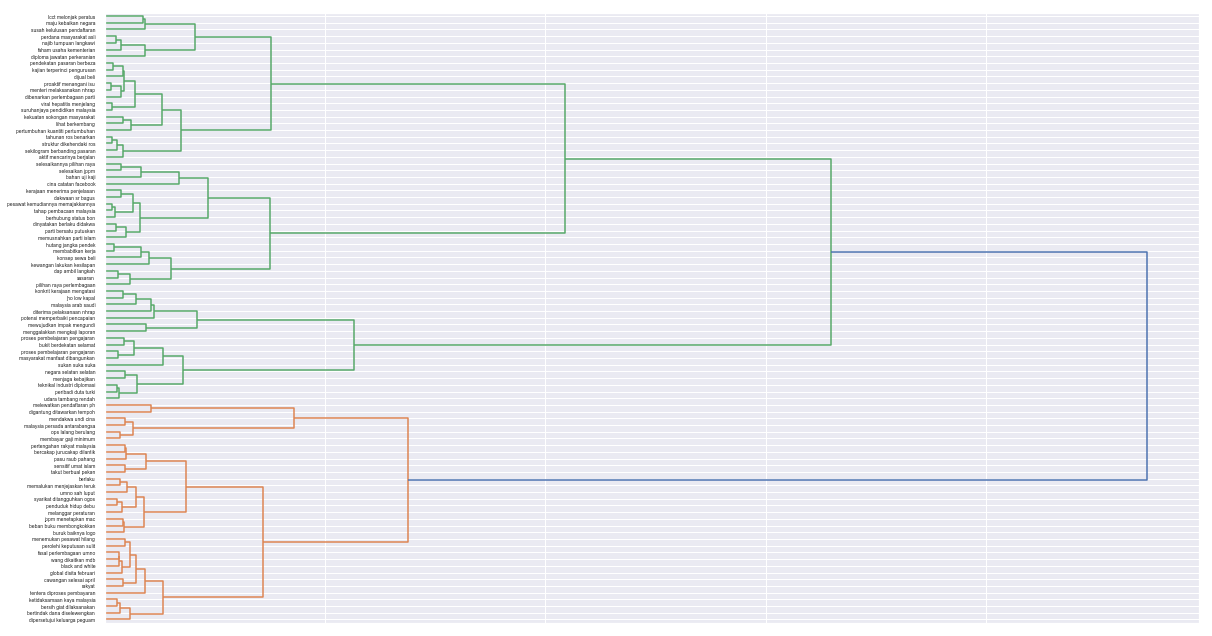

In [12]:
result_scatter = malaya.cluster.cluster_dendogram(corpus, vectorizer = model)

### Generate undirected graph for unsupervised clustering

```python
def cluster_graph(
    corpus: List[str],
    vectorizer,
    threshold: float = 0.9,
    num_clusters: int = 5,
    titles: List[str] = None,
    colors: List[str] = None,
    stopwords = get_stopwords,
    ngram: Tuple[int, int] = (1, 3),
    cleaning = simple_textcleaning,
    clustering = KMeans,
    figsize: Tuple[int, int] = (17, 9),
    with_labels: bool = True,
    batch_size: int = 20,
):
    """
    plot undirected graph with similar texts.

    Parameters
    ----------

    corpus: List[str]
    vectorizer: class
        vectorizer class.
    threshold: float, (default=0.9)
        0.9 means, 90% above absolute pearson correlation.
    num_clusters: int, (default=5)
        size of unsupervised clusters.
    titles: List[str], (default=True)
        list of titles, length must same with corpus.
    stopwords: List[str], (default=malaya.texts.function.get_stopwords)
        A callable that returned a List[str] or List[str] or Tuple[str].
    cleaning: function, (default=malaya.texts.function.simple_textcleaning)
        function to clean the corpus.
    ngram: Tuple[int, int], (default=(1,3))
        n-grams size to train a corpus.
    batch_size: int, (default=20)
        size of strings for each vectorization and attention. Only useful if use transformer vectorizer.

    Returns
    -------
    dictionary: {'G': G, 'pos': pos, 'node_colors': node_colors, 'node_labels': node_labels}
    """
```  

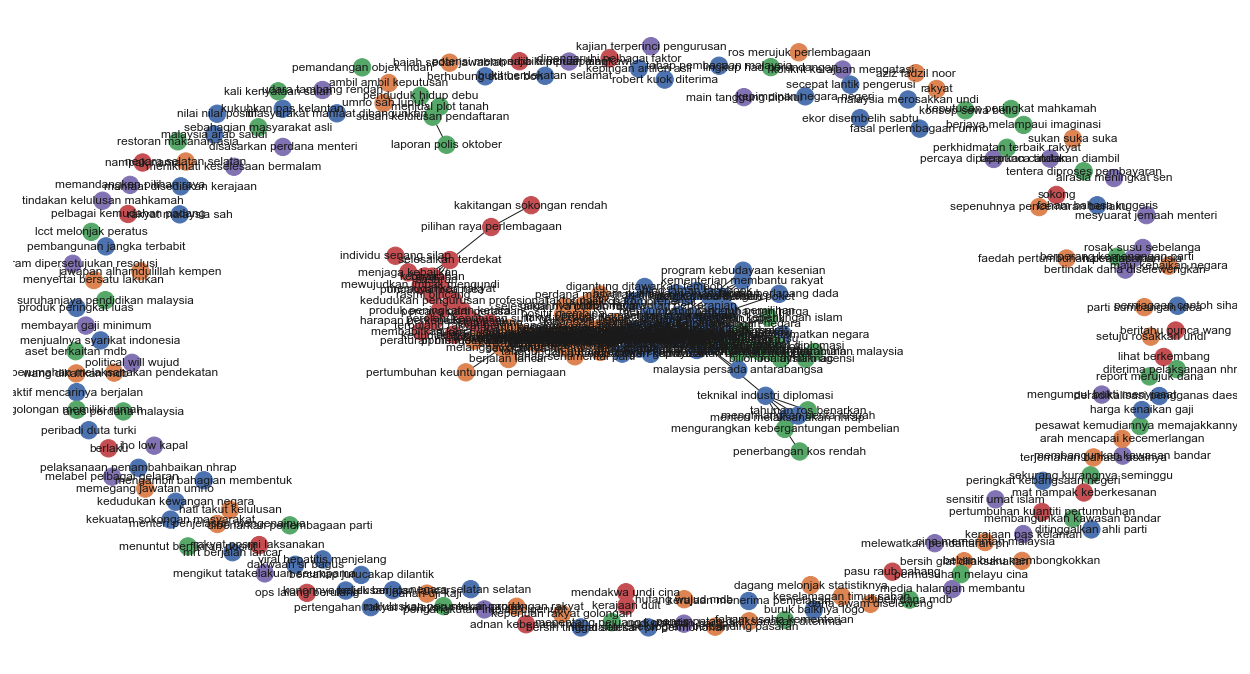

In [15]:
result_scatter = malaya.cluster.cluster_graph(corpus, vectorizer = similarity_model, threshold = 0.9)

### Generate undirected graph for Entities and topics relationship

```python
def cluster_entity_linking(
    corpus: List[str],
    vectorizer,
    entity_model,
    topic_modeling_model,
    threshold: float = 0.3,
    topic_decomposition: int = 2,
    topic_length: int = 10,
    fuzzy_ratio: int = 70,
    accepted_entities: List[str] = [
        'law',
        'location',
        'organization',
        'person',
        'event',
    ],
    cleaning = simple_textcleaning,
    colors: List[str] = None,
    stopwords = get_stopwords,
    max_df: float = 1.0,
    min_df: int = 1,
    ngram: Tuple[int, int] = (2, 3),
    figsize: Tuple[int, int] = (17, 9),
    batch_size: int = 20,
):
    """
    plot undirected graph for Entities and topics relationship.

    Parameters
    ----------
    corpus: list or str
    vectorizer: class
    titles: list
        list of titles, length must same with corpus.
    colors: list
        list of colors, length must same with num_clusters.
    threshold: float, (default=0.3)
        0.3 means, 30% above absolute pearson correlation.
    topic_decomposition: int, (default=2)
        size of decomposition.
    topic_length: int, (default=10)
        size of topic models.
    fuzzy_ratio: int, (default=70)
        size of ratio for fuzzywuzzy.
    max_df: float, (default=0.95)
        maximum of a word selected based on document frequency.
    min_df: int, (default=2)
        minimum of a word selected on based on document frequency.
    ngram: tuple, (default=(1,3))
        n-grams size to train a corpus.
    cleaning: function, (default=simple_textcleaning)
        function to clean the corpus.
    stopwords: List[str], (default=malaya.texts.function.get_stopwords)
        A callable that returned a List[str] or List[str] or Tuple[str]
        
    Returns
    -------
    dictionary: {'G': G, 'pos': pos, 'node_colors': node_colors, 'node_labels': node_labels}
    """
```   

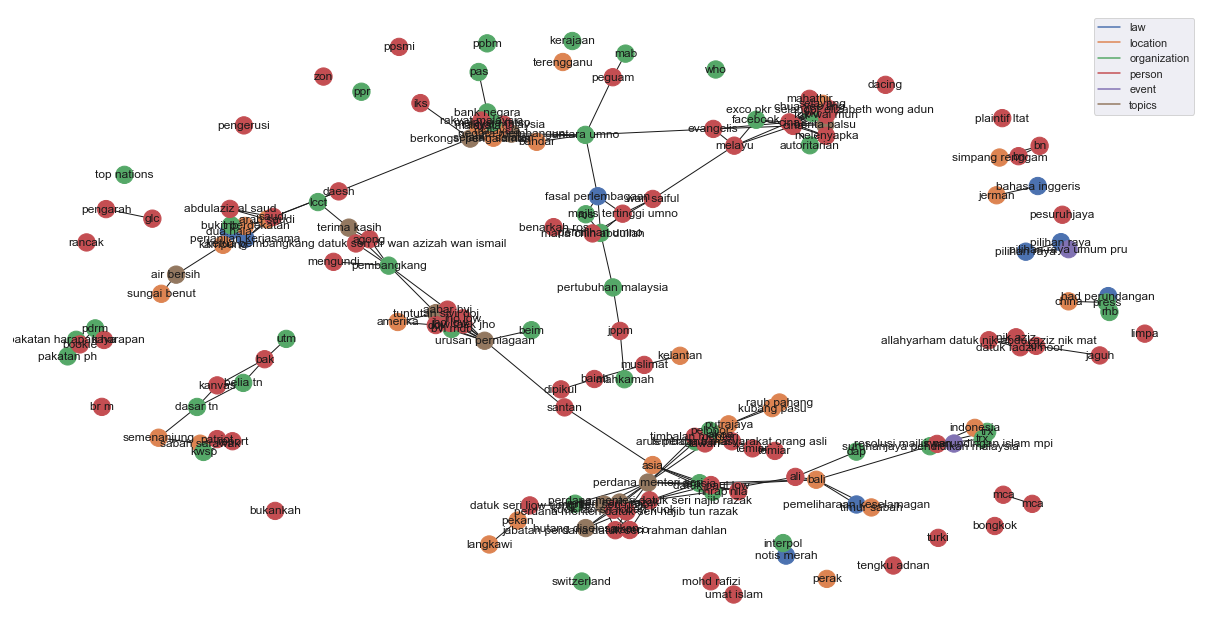

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vectorizer = TfidfVectorizer(
    ngram_range = (1, 3),
    min_df = 2,
    max_df = 0.95,
)
topic_model = malaya.topic_model.lda

result_linking = malaya.cluster.cluster_entity_linking(corpus,
                                                       tf_vectorizer,
                                                       entity,
                                                       topic_model)